<H1>1.7. Six degrees of separation.</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. 1.7, developed with Piet Brouwer)

Â© 2016, James Sethna, all rights reserved.


<br/>
2024.10.1. Jungeun Kim

Main reference: https://cac.cornell.edu/myers/teaching/ComputationalMethods/ComputerExercises/SmallWorld/SmallWorld.html

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import math
# import NetGraphics  # a separate module supporting network visualization
import imp
# from collections import

## (a)
Define a network object on the computer. For this exercise, the nodes will be represented by integers. Implement a network class, with five functions:
* `HasNode(node)`, which checks to see if a node is already in the network;
* `AddNode(node)`, which adds a new node to the system (if it is not already there);
* `AddEdge(node1, node2)`, which adds a new edge to the system;
* `GetNodes()`, which returns a list of existing nodes; and
* `GetNeighbors(node)`, which returns the neighbors of an existing node.

In [76]:
class Network :
    """An UndirectedGraph g contains a dictionary (g.connections) that
    maps a node identifier (key) to a list of nodes connected to (values).
    g.connections[node] returns a list [node2, node3, node4] of neighbors.
    Node identifiers can be any non-mutable Python type (e.g., integers,
    tuples, strings, but not lists).
    """

    def __init__(self) :
        """UndirectedGraph() creates an empty graph g.
	    g.connections starts as an empty dictionary.  When nodes are
	    added, the corresponding values need to be inserted into lists.

        A method/function definition in a class must begin with an instance
        of the class in question; by convention, the name "self" is used for
        this instance."""
        self.connections = {}


    def HasNode(self, node) :
        """Returns True if the graph contains the specified node, and
        False otherwise.  Check directly to see if the dictionary of
        connections contains the node, rather than (inefficiently)
        generating a list of all nodes and then searching for the
        specified node."""
        return node in self.connections


    def AddNode(self, node) :
	    # Uses HasNode(node) to determine if node has already been added.
        if HasNode(node) == False :
            self.connections[node] = []


    def AddEdge(self, node1, node2) :
        """
        Add node1 and node2 to network first
        Adds new edge 
        (appends node2 to connections[node1] and vice-versa, since it's
        an undirected graph)
        Do so only if old edge does not already exist 
        (node2 not in connections[node1])
        """
        self.AddNode(node1)
        self.AddNode(node2)
        if node2 in self.connections[node1] == False :
            self.connections[node1].append(node2)
        if node1 in self.connections[node2] == False :
            self.connections[node2].append(node1)


    def GetNodes(self):
        """g.GetNodes() returns all nodes (keys) in connections"""
        return list(self.connections.keys())


    def GetNeighbors(self, node):
        """g.GetNeighbors(node) returns a copy of the list of neighbors of
        the specified node.  A copy is returned (using the [:] operator) so
	    that the user does not inadvertently change the neighbor list."""
        return self.connections[node]



In [77]:
def create_small_world_network(L, Z, p) :
    graph = nx.Graph()
    
    # Add nodes and connection less than Z//2.
    for i in range(L) :
        graph.add_node(i)
        for j in range(1, Z//2 + 1) :
            graph.add_edge(i, (i + j) % L)
            graph.add_edge(i, (i - j) % L)
    
    # Add shortcut within p.
    num_shortcuts = int(p * L * Z / 2)
    for i in range(num_shortcuts) :
        node_1 = random.randint(0, L - 1)
        node_2 = random.randint(0, L - 1)
        if node_1 != node_2 :
            graph.add_edge(node_1, node_2)
    
    return graph

['A', 'B', 'D']


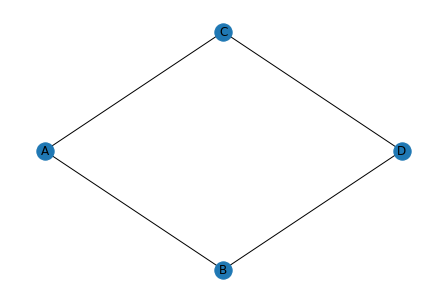

In [78]:
# Test#
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "D", weight=4)
print(nx.shortest_path(G, "A", "D", weight="weight"))
nx.draw_shell(G, with_labels = True)

In [79]:
L = 100
Z = 2
p = 0.1
graph = create_small_world_network(L, Z, p)

<br/>
<br/>

## (b)
* `FindPathLengthsFromNode(graph, node)`
* `FindAllPathLengths(graph)`<br/>
It generates a list of all lengths (one per pair of nodes in the graph) by repeatedly using FindPathLengthsFromNode. Check your function by testing that the histogram of path lengths at p = 0 is constant for 0 < l < L/Z, as advertised. Generate graphs at L = 1,000 and Z =2 for p=0.02 and p=0.2; display the circle graphs and plot the histogram of path lengths. Zoom in on the histogram; how much does it change with p? What value of p would you need to get “six degrees of separation”?
* `FindAveragePathLength(graph)`<br/>
It computes the mean ⟨l⟩ over all pairs of nodes. Compute $l$ for $Z = 2$, $L = 100$, and $p = 0.1$ a few times; your answer should be around $l = 10$. Notice that there are substantial statistical fluctuations in the value from sample to sample. Roughly how many long bonds are there in this system? Would you expect fluctuations in the distances?

In [80]:
def FindPathLengthsFromNode(graph, node) :
    dict_length = dict(nx.shortest_path_length(graph))
    return dict_length[node]         # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html

In [81]:
def FindAllPathLengths(graph) :
    arr_length = []
    for node in graph :
        for start_node, length in FindPathLengthsFromNode(graph, node).items() :
            if start_node != node :
                arr_length.append(length)
    return np.array(arr_length)

In [82]:
def FindAveragePathLength(graph) :
    return np.average(FindAllPathLengths(graph))        # https://numpy.org/doc/2.0/reference/generated/numpy.average.html

## (c) Histogram & Semi log plot


In [85]:
def histogram(graph) :
    plt.figure(figsize=(8,6))
    plt.hist(FindAllPathLengths(graph), bins=50, label='Histogram')           # 2024.10.1. Jungeun Kim -- modify from `normed=True` to `density=True`, python 3.9.
    plt.title('Path length')
    plt.legend()
    plt.xlabel('Frequency')
    plt.ylabel("Counts")
    plt.show()

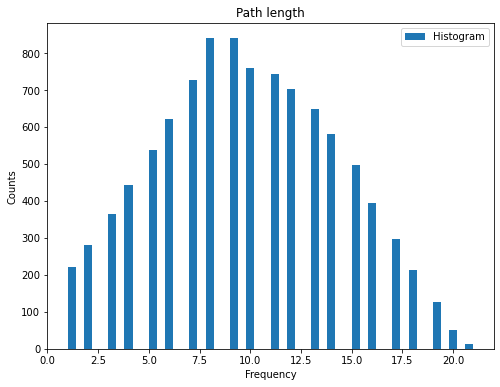

In [86]:
histogram(graph)

25.252525252525253


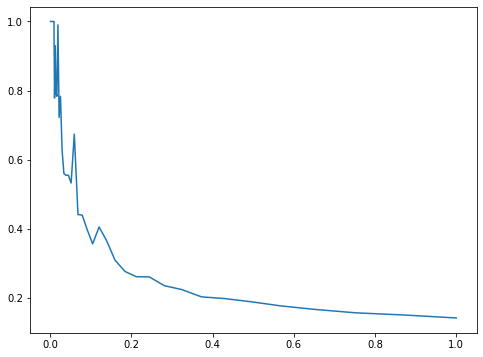

In [93]:
plt.figure(figsize=(8,6))
L = 100
Z = 2
avg_length_0 = FindAveragePathLength(create_small_world_network(L, Z, 0))
print(avg_length_0)
p =  np.logspace(-3, 0, num=50)
y = []
for temp_p in p :
    y.append(FindAveragePathLength(create_small_world_network(L, Z, temp_p))/avg_length_0)
# y = [FindAveragePathLength(create_small_world_network(L, Z, p))/avg_length_0 for p in np.arange(0.001, 1, 0.001)]
plt.plot(p, y)